In [2]:
import numpy as np # used for handling numbers
import pandas as pd # used for handling the dataset
from sklearn.impute import SimpleImputer # used for handling missing data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder # used for encoding categorical data
from sklearn.model_selection import train_test_split # used for splitting training and testing data
from sklearn.preprocessing import StandardScaler # used for feature scaling

In [3]:
df = pd.read_csv('fraud.csv') # to import the dataset into a variable
print(df.head())

   TransactionID  isFraud  TransactionDT  TransactionAmt ProductCD  card1  \
0        3037057        0        1190095           20.00         H  12839   
1        3037058        0        1190101          100.00         R  10057   
2        3037059        0        1190109          100.00         H   2691   
3        3037060        0        1190112           35.94         W   6730   
4        3037061        0        1190120          117.00         W  11849   

   card2  card3       card4  card5  ...                    id_31  id_32  \
0  321.0  150.0        visa  226.0  ...       mobile safari 10.0   32.0   
1  225.0  150.0  mastercard  224.0  ...  chrome 62.0 for android   32.0   
2  490.0  150.0        visa  162.0  ...              chrome 62.0   24.0   
3    NaN  150.0        visa  226.0  ...                      NaN    NaN   
4  271.0  150.0        visa  226.0  ...                      NaN    NaN   

       id_33           id_34  id_35 id_36 id_37  id_38  DeviceType  \
0  2048x1536  ma

In [4]:
# Determine number of fraud cases in dataset
# Let’s separate the Fraudulent cases from the authentic ones and compare 
# their occurrences in the dataset.
fraud = df[df['isFraud'] == 1]
valid = df[df['isFraud'] == 0]
print(f'fraud: {len(fraud)}')
print(f'valid: {len(valid)}')

outlier_fraction = len(fraud)/float(len(valid))
print(outlier_fraction)

fraud: 19306
valid: 521177
0.03704307749574521


In [5]:
print('Amount details of fraudulent transaction')
print(fraud.TransactionAmt.describe())
print('Details of valid transaction')
print(valid.TransactionAmt.describe())

Amount details of fraudulent transaction
count    19306.000000
mean       149.486727
std        233.456767
min          0.292000
25%         34.750000
50%         74.700000
75%        161.000000
max       5190.000000
Name: TransactionAmt, dtype: float64
Details of valid transaction
count    521177.000000
mean        135.155271
std         241.705338
min           0.251000
25%          44.000000
50%          68.500000
75%         120.000000
max       31940.000000
Name: TransactionAmt, dtype: float64


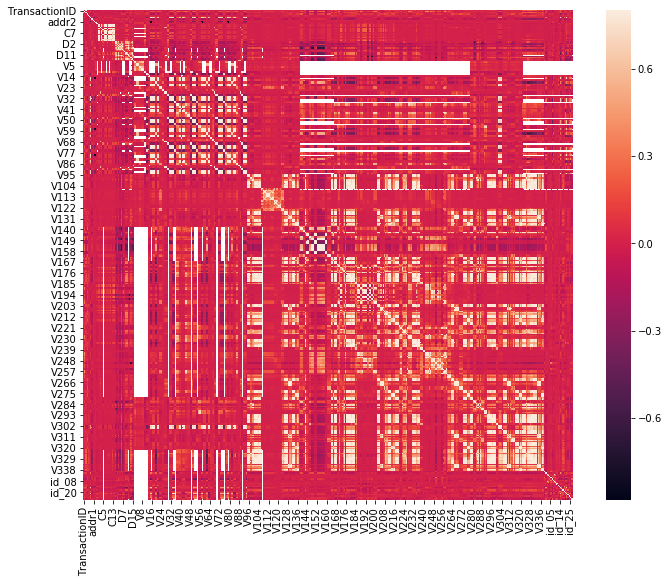

In [6]:
# Correlation matrix graphically gives us an idea of how features
# correlate with each other and can help us predict what are the features
# that are most relevant for the prediction.

# Correlation matrix
# import the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec

corrmat = df.corr()
fig = plt.figure(figsize = (12, 9))

sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

In [ ]:
print(df.shape) # Returns number of columns and rows
print(df.isnull().any().sum())
print(df['isFraud'].value_counts())

In [29]:
y = df['isFraud']
#x = df.iloc[:, 3:].copy() # All rows, All columns starting from third 
x = df.drop(['isFraud'], axis=1)
print(x.head())

   TransactionID  TransactionDT  TransactionAmt ProductCD  card1  card2  \
0        3037057        1190095           20.00         H  12839  321.0   
1        3037058        1190101          100.00         R  10057  225.0   
2        3037059        1190109          100.00         H   2691  490.0   
3        3037060        1190112           35.94         W   6730    NaN   
4        3037061        1190120          117.00         W  11849  271.0   

   card3       card4  card5   card6  ...                    id_31  id_32  \
0  150.0        visa  226.0   debit  ...       mobile safari 10.0   32.0   
1  150.0  mastercard  224.0   debit  ...  chrome 62.0 for android   32.0   
2  150.0        visa  162.0  credit  ...              chrome 62.0   24.0   
3  150.0        visa  226.0   debit  ...                      NaN    NaN   
4  150.0        visa  226.0   debit  ...                      NaN    NaN   

       id_33           id_34 id_35 id_36  id_37  id_38  DeviceType  \
0  2048x1536  match_st

In [30]:
print(f'Number of rows: {x.shape[0]}')
print(f'30% of total rows: {round(x.shape[0] * 0.25)}')

# Calculate 25% of null values from the whole table
# if it exceeds max allowed value, then drop the column
max_allowed_null_values = round(x.shape[0] * 0.25)
for column in x:
    total_null_values = x[column].isnull().sum()
    if total_null_values > max_allowed_null_values:
        x.drop(column, inplace=True, axis=1)
        continue
    print(f'{column}: {total_null_values}')
    

Number of rows: 540483
30% of total rows: 135121
TransactionID: 0
TransactionDT: 0
TransactionAmt: 0
ProductCD: 0
card1: 0
card2: 8235
card3: 1562
card4: 1571
card5: 4024
card6: 1568
addr1: 63115
addr2: 63115
P_emaildomain: 85457
C1: 0
C2: 0
C3: 0
C4: 0
C5: 0
C6: 0
C7: 0
C8: 0
C9: 0
C10: 0
C11: 0
C12: 0
C13: 0
C14: 0
D1: 1269
D10: 63835
D15: 72594
V12: 63882
V13: 63882
V14: 63882
V15: 63882
V16: 63882
V17: 63882
V18: 63882
V19: 63882
V20: 63882
V21: 63882
V22: 63882
V23: 63882
V24: 63882
V25: 63882
V26: 63882
V27: 63882
V28: 63882
V29: 63882
V30: 63882
V31: 63882
V32: 63882
V33: 63882
V34: 63882
V53: 65360
V54: 65360
V55: 65360
V56: 65360
V57: 65360
V58: 65360
V59: 65360
V60: 65360
V61: 65360
V62: 65360
V63: 65360
V64: 65360
V65: 65360
V66: 65360
V67: 65360
V68: 65360
V69: 65360
V70: 65360
V71: 65360
V72: 65360
V73: 65360
V74: 65360
V75: 72642
V76: 72642
V77: 72642
V78: 72642
V79: 72642
V80: 72642
V81: 72642
V82: 72642
V83: 72642
V84: 72642
V85: 72642
V86: 72642
V87: 72642
V88: 72642
V

In [31]:
print(y.head())

0    0
1    0
2    0
3    0
4    0
Name: isFraud, dtype: int64


In [32]:
# Check what categorical colums needs to be converted:
# ProductCD, card4, card6, P_emaildomain:
print('Show columns type:')
for column in x:
    print(f'{column}: {x[column].dtype}')
    

Show columns type:
TransactionID: int64
TransactionDT: int64
TransactionAmt: float64
ProductCD: object
card1: int64
card2: float64
card3: float64
card4: object
card5: float64
card6: object
addr1: float64
addr2: float64
P_emaildomain: object
C1: int64
C2: int64
C3: int64
C4: int64
C5: int64
C6: int64
C7: int64
C8: int64
C9: int64
C10: int64
C11: int64
C12: int64
C13: int64
C14: int64
D1: float64
D10: float64
D15: float64
V12: float64
V13: float64
V14: float64
V15: float64
V16: float64
V17: float64
V18: float64
V19: float64
V20: float64
V21: float64
V22: float64
V23: float64
V24: float64
V25: float64
V26: float64
V27: float64
V28: float64
V29: float64
V30: float64
V31: float64
V32: float64
V33: float64
V34: float64
V53: float64
V54: float64
V55: float64
V56: float64
V57: float64
V58: float64
V59: float64
V60: float64
V61: float64
V62: float64
V63: float64
V64: float64
V65: float64
V66: float64
V67: float64
V68: float64
V69: float64
V70: float64
V71: float64
V72: float64
V73: float64
V74:

In [33]:
# Display unique values of categorical data
print(x['ProductCD'].unique())  # does not have null values
print(x['card4'].unique())
print(x['card6'].unique())
print(x['P_emaildomain'].unique())

['H' 'R' 'W' 'C' 'S']
['visa' 'mastercard' 'american express' 'discover' nan]
['debit' 'credit' 'debit or credit' nan 'charge card']
['yahoo.com' 'gmail.com' 'comcast.net' nan 'anonymous.com' 'aol.com'
 'icloud.com' 'hotmail.com' 'cox.net' 'verizon.net' 'msn.com'
 'outlook.com' 'sbcglobal.net' 'mac.com' 'att.net' 'earthlink.net'
 'bellsouth.net' 'optonline.net' 'ymail.com' 'charter.net' 'mail.com'
 'me.com' 'embarqmail.com' 'cfl.rr.com' 'yahoo.com.mx' 'live.com'
 'twc.com' 'rocketmail.com' 'windstream.net' 'juno.com' 'outlook.es'
 'netzero.net' 'frontiernet.net' 'yahoo.es' 'netzero.com' 'prodigy.net.mx'
 'sc.rr.com' 'suddenlink.net' 'protonmail.com' 'q.com' 'hotmail.es'
 'gmail' 'gmx.de' 'web.de' 'live.com.mx' 'frontier.com' 'yahoo.co.uk'
 'aim.com' 'roadrunner.com' 'cableone.net' 'hotmail.fr' 'yahoo.fr'
 'ptd.net' 'yahoo.de' 'servicios-ta.com' 'centurylink.net' 'hotmail.co.uk'
 'hotmail.de' 'yahoo.co.jp' 'live.fr']


In [34]:
# It has 3 countries listed. In a larger dataset, these may be large groups of data.
# Since countries don’t have a mathematical relation between them unless we 
# are considering some known factors such as size or population etc ,
# coding them in numbers will not work, as a number may be less than or
# greater than another number. Dummy variables are the solution. 
# Using one hot encoding we will create a dummy variable for each of the category 
# in the column. And uses binary encoding for each dummy variable. We do not need 
# to create dummy variables for the feature purchased_item as it has only 
# 2 categories either yes or no.

# Add dummy entry 
x['card4'] = x['card4'].fillna('unknown') # Change nan to unknown
x['card6'] = x['card6'].fillna('unknown')
x['P_emaildomain'] = x['P_emaildomain'].fillna('unknown')
print(x['card4'].unique())
print(x['card6'].unique())
print(x['P_emaildomain'].unique())
print(x['card4'].isnull().sum())
print(x['card6'].isnull().sum())
print(x['P_emaildomain'].isnull().sum())

['visa' 'mastercard' 'american express' 'discover' 'unknown']
['debit' 'credit' 'debit or credit' 'unknown' 'charge card']
['yahoo.com' 'gmail.com' 'comcast.net' 'unknown' 'anonymous.com' 'aol.com'
 'icloud.com' 'hotmail.com' 'cox.net' 'verizon.net' 'msn.com'
 'outlook.com' 'sbcglobal.net' 'mac.com' 'att.net' 'earthlink.net'
 'bellsouth.net' 'optonline.net' 'ymail.com' 'charter.net' 'mail.com'
 'me.com' 'embarqmail.com' 'cfl.rr.com' 'yahoo.com.mx' 'live.com'
 'twc.com' 'rocketmail.com' 'windstream.net' 'juno.com' 'outlook.es'
 'netzero.net' 'frontiernet.net' 'yahoo.es' 'netzero.com' 'prodigy.net.mx'
 'sc.rr.com' 'suddenlink.net' 'protonmail.com' 'q.com' 'hotmail.es'
 'gmail' 'gmx.de' 'web.de' 'live.com.mx' 'frontier.com' 'yahoo.co.uk'
 'aim.com' 'roadrunner.com' 'cableone.net' 'hotmail.fr' 'yahoo.fr'
 'ptd.net' 'yahoo.de' 'servicios-ta.com' 'centurylink.net' 'hotmail.co.uk'
 'hotmail.de' 'yahoo.co.jp' 'live.fr']
0
0
0


In [35]:
print(x.head())

   TransactionID  TransactionDT  TransactionAmt ProductCD  card1  card2  \
0        3037057        1190095           20.00         H  12839  321.0   
1        3037058        1190101          100.00         R  10057  225.0   
2        3037059        1190109          100.00         H   2691  490.0   
3        3037060        1190112           35.94         W   6730    NaN   
4        3037061        1190120          117.00         W  11849  271.0   

   card3       card4  card5   card6  ...   V312   V313   V314   V315  V316  \
0  150.0        visa  226.0   debit  ...    0.0    0.0    0.0    0.0   0.0   
1  150.0  mastercard  224.0   debit  ...    0.0    0.0    0.0    0.0   0.0   
2  150.0        visa  162.0  credit  ...    0.0    0.0    0.0    0.0   0.0   
3  150.0        visa  226.0   debit  ...  100.0    0.0    0.0    0.0   0.0   
4  150.0        visa  226.0   debit  ...    0.0  213.0  213.0  213.0   0.0   

   V317  V318  V319  V320  V321  
0   0.0   0.0   0.0   0.0   0.0  
1   0.0   0.

In [36]:
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()
# Convert categorical data by using Lable encoding technic 
# https://pbpython.com/categorical-encoding.html
for column in ('card4', 'card6', 'P_emaildomain', 'ProductCD'):
    x[f'{column}'] = lb.fit_transform(x[column])
                                                            
x[['card4',
    'card6',
    'P_emaildomain',
    'ProductCD']].head(50)  

,card4,card6,P_emaildomain,ProductCD
0,4,2,54,1
1,2,2,16,2
2,4,1,16,1
3,4,2,16,4
4,4,2,54,4
5,4,1,9,1
6,4,2,48,4
7,4,1,1,2
8,2,2,2,4
9,4,2,2,4


In [37]:
print(x.head())

   TransactionID  TransactionDT  TransactionAmt  ProductCD  card1  card2  \
0        3037057        1190095           20.00          1  12839  321.0   
1        3037058        1190101          100.00          2  10057  225.0   
2        3037059        1190109          100.00          1   2691  490.0   
3        3037060        1190112           35.94          4   6730    NaN   
4        3037061        1190120          117.00          4  11849  271.0   

   card3  card4  card5  card6  ...   V312   V313   V314   V315  V316  V317  \
0  150.0      4  226.0      2  ...    0.0    0.0    0.0    0.0   0.0   0.0   
1  150.0      2  224.0      2  ...    0.0    0.0    0.0    0.0   0.0   0.0   
2  150.0      4  162.0      1  ...    0.0    0.0    0.0    0.0   0.0   0.0   
3  150.0      4  226.0      2  ...  100.0    0.0    0.0    0.0   0.0   0.0   
4  150.0      4  226.0      2  ...    0.0  213.0  213.0  213.0   0.0   0.0   

   V318  V319  V320  V321  
0   0.0   0.0   0.0   0.0  
1   0.0   0.0   0.

In [32]:
#x.drop(['card4_code','card6_code','P_emaildomain_code','ProductCD_code'], 1, inplace=True)

In [13]:
x

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
0,3037057,1190095,20.00,1,12839,321.0,150.0,4,226.0,2,...,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00
1,3037058,1190101,100.00,2,10057,225.0,150.0,2,224.0,2,...,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00
2,3037059,1190109,100.00,1,2691,490.0,150.0,4,162.0,1,...,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00
3,3037060,1190112,35.94,4,6730,NaN,150.0,4,226.0,2,...,100.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00
4,3037061,1190120,117.00,4,11849,271.0,150.0,4,226.0,2,...,0.0,213.00,213.00,213.00,0.0,0.0,0.0,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540478,3577535,15811047,49.00,4,6550,NaN,150.0,4,226.0,2,...,0.0,47.94,47.94,47.94,0.0,0.0,0.0,0.00,0.00,0.00
540479,3577536,15811049,39.50,4,10444,225.0,150.0,2,224.0,2,...,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00
540480,3577537,15811079,30.95,4,12037,595.0,150.0,2,224.0,2,...,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00
540481,3577538,15811088,117.00,4,7826,481.0,150.0,2,224.0,2,...,117.0,317.50,669.50,317.50,0.0,2234.0,0.0,0.00,0.00,0.00


In [38]:
# Check what categorical colums needs to be converted:
# ProductCD, card4, card6, P_emaildomain:
print('Show columns type:')
for column in x:
    print(f'{column}: {x[column].dtype}')

Show columns type:
TransactionID: int64
TransactionDT: int64
TransactionAmt: float64
ProductCD: int64
card1: int64
card2: float64
card3: float64
card4: int64
card5: float64
card6: int64
addr1: float64
addr2: float64
P_emaildomain: int64
C1: int64
C2: int64
C3: int64
C4: int64
C5: int64
C6: int64
C7: int64
C8: int64
C9: int64
C10: int64
C11: int64
C12: int64
C13: int64
C14: int64
D1: float64
D10: float64
D15: float64
V12: float64
V13: float64
V14: float64
V15: float64
V16: float64
V17: float64
V18: float64
V19: float64
V20: float64
V21: float64
V22: float64
V23: float64
V24: float64
V25: float64
V26: float64
V27: float64
V28: float64
V29: float64
V30: float64
V31: float64
V32: float64
V33: float64
V34: float64
V53: float64
V54: float64
V55: float64
V56: float64
V57: float64
V58: float64
V59: float64
V60: float64
V61: float64
V62: float64
V63: float64
V64: float64
V65: float64
V66: float64
V67: float64
V68: float64
V69: float64
V70: float64
V71: float64
V72: float64
V73: float64
V74: flo

In [39]:
# https://analyticsindiamag.com/data-pre-processing-in-python/
#https://towardsdatascience.com/handling-missing-values-in-machine-learning-part-1-dda69d4f88ca

# We have already noticed the missing fields in the data denoted by “nan”. 
# Machine learning models cannot accommodate missing fields in the data 
# they are provided with.So the missing fields must be filled with values 
# that will not affect the variance of the data or make it more noisy.

#The scikit-learn library’s SimpleImputer Class allows us to impute
# the missing fields in a dataset with valid data. In the above code,
# we have used the default strategy for filling missing values which is the mean.

# MEDIAN :Suitable for continuous data with outliers

from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy="median")
x_columns_name = x.columns
X = imp.fit_transform(x)
X = pd.DataFrame(data=X, columns=x_columns_name)
print(x.head(60))
print(X.head(60))
#Y = y.reshape(-1,1)
#Y = imp.fit_transform(y)
#Y = y.reshape(-1)

    TransactionID  TransactionDT  TransactionAmt  ProductCD  card1  card2  \
0         3037057        1190095           20.00          1  12839  321.0   
1         3037058        1190101          100.00          2  10057  225.0   
2         3037059        1190109          100.00          1   2691  490.0   
3         3037060        1190112           35.94          4   6730    NaN   
4         3037061        1190120          117.00          4  11849  271.0   
5         3037062        1190141           50.00          1   9803  583.0   
6         3037063        1190149           68.94          4  10063  555.0   
7         3037064        1190157          200.00          2   7585  553.0   
8         3037065        1190165          117.00          4   7919  194.0   
9         3037066        1190195          270.00          4  12695  490.0   
10        3037067        1190199          600.00          2  15410  399.0   
11        3037068        1190205          117.00          4   5291  442.0   

In [40]:
print(x.shape)
print(X.shape)

(540483, 181)
(540483, 181)


In [41]:
new_data = pd.concat([X, y], axis=1).copy()
print(new_data.head())

   TransactionID  TransactionDT  TransactionAmt  ProductCD    card1  card2  \
0      3037057.0      1190095.0           20.00        1.0  12839.0  321.0   
1      3037058.0      1190101.0          100.00        2.0  10057.0  225.0   
2      3037059.0      1190109.0          100.00        1.0   2691.0  490.0   
3      3037060.0      1190112.0           35.94        4.0   6730.0  361.0   
4      3037061.0      1190120.0          117.00        4.0  11849.0  271.0   

   card3  card4  card5  card6  ...   V313   V314   V315  V316  V317  V318  \
0  150.0    4.0  226.0    2.0  ...    0.0    0.0    0.0   0.0   0.0   0.0   
1  150.0    2.0  224.0    2.0  ...    0.0    0.0    0.0   0.0   0.0   0.0   
2  150.0    4.0  162.0    1.0  ...    0.0    0.0    0.0   0.0   0.0   0.0   
3  150.0    4.0  226.0    2.0  ...    0.0    0.0    0.0   0.0   0.0   0.0   
4  150.0    4.0  226.0    2.0  ...  213.0  213.0  213.0   0.0   0.0   0.0   

   V319  V320  V321  isFraud  
0   0.0   0.0   0.0        0  
1   0.

In [42]:
# Check nulls in data
new_data.isnull().values.any()
new_data.isnull().sum()

TransactionID     0
TransactionDT     0
TransactionAmt    0
ProductCD         0
card1             0
                 ..
V318              0
V319              0
V320              0
V321              0
isFraud           0
Length: 182, dtype: int64

In [43]:
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

TransactionID      270241.00
TransactionDT     7523111.00
TransactionAmt         81.47
ProductCD               0.00
card1                8163.00
                     ...    
V317                    0.00
V318                    0.00
V319                    0.00
V320                    0.00
V321                    0.00
Length: 181, dtype: float64


In [45]:
# Table with outliers ( True is outliers) table for visualization 
test = (X < (Q1 - 1.5 * IQR)) |(X > (Q3 + 1.5 * IQR))
print(test)

        TransactionID  TransactionDT  TransactionAmt  ProductCD  card1  card2  \
0               False          False           False       True  False  False   
1               False          False           False       True  False  False   
2               False          False           False       True  False  False   
3               False          False           False      False  False  False   
4               False          False           False      False  False  False   
...               ...            ...             ...        ...    ...    ...   
540478          False          False           False      False  False  False   
540479          False          False           False      False  False  False   
540480          False          False           False      False  False  False   
540481          False          False           False      False  False  False   
540482          False          False            True      False  False  False   

        card3  card4  card5

In [46]:
# https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba
# https://www.purplemath.com/modules/boxwhisk3.htm
# Remove all raws that have outliers. decided not to update  outliers ( which has true value is outliers)

dataset = new_data[~((X < (Q1 - 1.5 * IQR)) |(X > (Q3 + 1.5 * IQR))).any(axis=1)]

print(dataset.head())
print(dataset.shape)

    TransactionID  TransactionDT  TransactionAmt  ProductCD    card1  card2  \
11      3037068.0      1190205.0          117.00        4.0   5291.0  442.0   
17      3037074.0      1190247.0           26.50        4.0   8320.0  476.0   
20      3037077.0      1190271.0           51.00        4.0  11465.0  360.0   
25      3037082.0      1190317.0           34.50        4.0   9112.0  250.0   
31      3037088.0      1190370.0           35.94        4.0  16883.0  111.0   

    card3  card4  card5  card6  ...  V313  V314  V315  V316  V317  V318  V319  \
11  150.0    4.0  226.0    2.0  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
17  150.0    4.0  166.0    2.0  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
20  150.0    4.0  166.0    2.0  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
25  150.0    4.0  226.0    2.0  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
31  150.0    4.0  226.0    2.0  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

    V320  V321  isFraud  
11   0.0   0

In [48]:
# Write pre-processed data to excel file
from pandas import ExcelWriter
from pandas import ExcelFile
import openpyxl

with pd.ExcelWriter('fraud_before_scaling.xlsx') as ew:
    dataset.to_excel(ew,'Sheet1',index=False)

    TransactionID  TransactionDT  TransactionAmt  ProductCD    card1  card2  \
11      3037068.0      1190205.0          117.00        4.0   5291.0  442.0   
17      3037074.0      1190247.0           26.50        4.0   8320.0  476.0   
20      3037077.0      1190271.0           51.00        4.0  11465.0  360.0   
25      3037082.0      1190317.0           34.50        4.0   9112.0  250.0   
31      3037088.0      1190370.0           35.94        4.0  16883.0  111.0   

    card3  card4  card5  card6  ...  V312  V313  V314  V315  V316  V317  V318  \
11  150.0    4.0  226.0    2.0  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
17  150.0    4.0  166.0    2.0  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
20  150.0    4.0  166.0    2.0  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
25  150.0    4.0  226.0    2.0  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
31  150.0    4.0  226.0    2.0  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

    V319  V320  V321  
11   0.0   0.0 

In [1]:
import numpy as np # used for handling numbers
import pandas as pd # used for handling the dataset
from sklearn.impute import SimpleImputer # used for handling missing data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder # used for encoding categorical data
from sklearn.model_selection import train_test_split # used for splitting training and testing data
from sklearn.preprocessing import StandardScaler # used for feature scaling

In [3]:
df = pd.read_excel('fraud_before_scaling.xlsx') # to import the dataset into a variable
print(df.head())

   TransactionID  TransactionDT  TransactionAmt  ProductCD  card1  card2  \
0        3037068        1190205          117.00          4   5291    442   
1        3037074        1190247           26.50          4   8320    476   
2        3037077        1190271           51.00          4  11465    360   
3        3037082        1190317           34.50          4   9112    250   
4        3037088        1190370           35.94          4  16883    111   

   card3  card4  card5  card6  ...  V313  V314  V315  V316  V317  V318  V319  \
0    150      4    226      2  ...     0     0     0     0     0     0     0   
1    150      4    166      2  ...     0     0     0     0     0     0     0   
2    150      4    166      2  ...     0     0     0     0     0     0     0   
3    150      4    226      2  ...     0     0     0     0     0     0     0   
4    150      4    226      2  ...     0     0     0     0     0     0     0   

   V320  V321  isFraud  
0     0     0        0  
1     0     

In [2]:
y = df['isFraud']
X = df.drop(['isFraud'], axis=1)
print(X.head())
print(y.head())

NameError: name 'df' is not defined

In [5]:
import pandas as pd
from sklearn import preprocessing

# http://benalexkeen.com/feature-scaling-with-scikit-learn/
# The normalizer scales each value by dividing each value by its magnitude
# in n-dimensional space for n number of features.

#Say your features were x, y and z Cartesian co-ordinates your scaled value for x
# would be:

scaler = preprocessing.Normalizer()
scaled_df = scaler.fit_transform(X)
scaled_df = pd.DataFrame(scaled_df, columns=X.columns)
print(scaled_df.head())
print(scaled_df.shape)
print(X.shape)

   TransactionID  TransactionDT  TransactionAmt  ProductCD     card1  \
0       0.931056       0.364874        0.000036   0.000001  0.001622   
1       0.931050       0.364884        0.000008   0.000001  0.002551   
2       0.931044       0.364889        0.000016   0.000001  0.003515   
3       0.931042       0.364901        0.000011   0.000001  0.002793   
4       0.931028       0.364911        0.000011   0.000001  0.005176   

      card2     card3     card4     card5         card6  ...  V312  V313  \
0  0.000136  0.000046  0.000001  0.000069  6.131279e-07  ...   0.0   0.0   
1  0.000146  0.000046  0.000001  0.000051  6.131227e-07  ...   0.0   0.0   
2  0.000110  0.000046  0.000001  0.000051  6.131188e-07  ...   0.0   0.0   
3  0.000077  0.000046  0.000001  0.000069  6.131161e-07  ...   0.0   0.0   
4  0.000034  0.000046  0.000001  0.000069  6.131056e-07  ...   0.0   0.0   

   V314  V315  V316  V317  V318  V319  V320  V321  
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
1   0.

In [6]:
X = scaled_df.copy()
print(y.head())
print(X.head())

0    0
1    0
2    0
3    0
4    0
Name: isFraud, dtype: int64
   TransactionID  TransactionDT  TransactionAmt  ProductCD     card1  \
0       0.931056       0.364874        0.000036   0.000001  0.001622   
1       0.931050       0.364884        0.000008   0.000001  0.002551   
2       0.931044       0.364889        0.000016   0.000001  0.003515   
3       0.931042       0.364901        0.000011   0.000001  0.002793   
4       0.931028       0.364911        0.000011   0.000001  0.005176   

      card2     card3     card4     card5         card6  ...  V312  V313  \
0  0.000136  0.000046  0.000001  0.000069  6.131279e-07  ...   0.0   0.0   
1  0.000146  0.000046  0.000001  0.000051  6.131227e-07  ...   0.0   0.0   
2  0.000110  0.000046  0.000001  0.000051  6.131188e-07  ...   0.0   0.0   
3  0.000077  0.000046  0.000001  0.000069  6.131161e-07  ...   0.0   0.0   
4  0.000034  0.000046  0.000001  0.000069  6.131056e-07  ...   0.0   0.0   

   V314  V315  V316  V317  V318  V319  V320  V3

In [7]:
new_data = pd.concat([X, y], axis=1)
print(new_data.head())
print(new_data.shape)
print(df.shape)

   TransactionID  TransactionDT  TransactionAmt  ProductCD     card1  \
0       0.931056       0.364874        0.000036   0.000001  0.001622   
1       0.931050       0.364884        0.000008   0.000001  0.002551   
2       0.931044       0.364889        0.000016   0.000001  0.003515   
3       0.931042       0.364901        0.000011   0.000001  0.002793   
4       0.931028       0.364911        0.000011   0.000001  0.005176   

      card2     card3     card4     card5         card6  ...  V313  V314  \
0  0.000136  0.000046  0.000001  0.000069  6.131279e-07  ...   0.0   0.0   
1  0.000146  0.000046  0.000001  0.000051  6.131227e-07  ...   0.0   0.0   
2  0.000110  0.000046  0.000001  0.000051  6.131188e-07  ...   0.0   0.0   
3  0.000077  0.000046  0.000001  0.000069  6.131161e-07  ...   0.0   0.0   
4  0.000034  0.000046  0.000001  0.000069  6.131056e-07  ...   0.0   0.0   

   V315  V316  V317  V318  V319  V320  V321  isFraud  
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0        0  


In [8]:
# Write pre-processed data to excel file
from pandas import ExcelWriter
from pandas import ExcelFile
import openpyxl

with pd.ExcelWriter('fraud_scaled.xlsx') as ew:
    new_data.to_excel(ew,'Sheet1',index=False)
    

       TransactionID  TransactionDT  TransactionAmt     ProductCD     card1  \
55915       0.260145       0.965569        0.000002  2.989070e-07  0.000145   
8016        0.722013       0.691877        0.000006  9.219374e-07  0.001825   
16097       0.566046       0.824367        0.000010  7.097996e-07  0.003218   
29045       0.408965       0.912550        0.000011  4.982184e-07  0.001047   
2220        0.880398       0.474232        0.000022  1.149866e-06  0.001579   

          card2     card3         card4     card5         card6  ...  V312  \
55915  0.000027  0.000011  2.989070e-07  0.000012  1.494535e-07  ...   0.0   
8016   0.000045  0.000035  4.609687e-07  0.000047  4.609687e-07  ...   0.0   
16097  0.000101  0.000027  3.548998e-07  0.000021  3.548998e-07  ...   0.0   
29045  0.000033  0.000019  4.982184e-07  0.000028  2.491092e-07  ...   0.0   
2220   0.000032  0.000043  1.149866e-06  0.000065  5.749332e-07  ...   0.0   

       V313  V314  V315  V316  V317  V318  V319  V320  V

In [9]:
import numpy as np # used for handling numbers
import pandas as pd # used for handling the dataset
from sklearn.impute import SimpleImputer # used for handling missing data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder # used for encoding categorical data
from sklearn.model_selection import train_test_split # used for splitting training and testing data
from sklearn.preprocessing import StandardScaler # used for feature scaling
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('fraud_scaled.xlsx') # to import the dataset into a variable
print(df.head())

   TransactionID  TransactionDT  TransactionAmt  ProductCD     card1  \
0       0.931056       0.364874        0.000036   0.000001  0.001622   
1       0.931050       0.364884        0.000008   0.000001  0.002551   
2       0.931044       0.364889        0.000016   0.000001  0.003515   
3       0.931042       0.364901        0.000011   0.000001  0.002793   
4       0.931028       0.364911        0.000011   0.000001  0.005176   

      card2     card3     card4     card5         card6  ...  V313  V314  \
0  0.000136  0.000046  0.000001  0.000069  6.131279e-07  ...     0     0   
1  0.000146  0.000046  0.000001  0.000051  6.131227e-07  ...     0     0   
2  0.000110  0.000046  0.000001  0.000051  6.131188e-07  ...     0     0   
3  0.000077  0.000046  0.000001  0.000069  6.131161e-07  ...     0     0   
4  0.000034  0.000046  0.000001  0.000069  6.131056e-07  ...     0     0   

   V315  V316  V317  V318  V319  V320  V321  isFraud  
0     0     0     0     0     0     0     0        0  


In [3]:
print(df['isFraud'].value_counts())

0    67075
1      498
Name: isFraud, dtype: int64


In [4]:
y = df['isFraud']
X = df.drop(['isFraud'], axis=1).iloc[:, 2:]
print(X.head())
print(y.head())

   TransactionAmt  ProductCD     card1     card2     card3     card4  \
0        0.000036   0.000001  0.001622  0.000136  0.000046  0.000001   
1        0.000008   0.000001  0.002551  0.000146  0.000046  0.000001   
2        0.000016   0.000001  0.003515  0.000110  0.000046  0.000001   
3        0.000011   0.000001  0.002793  0.000077  0.000046  0.000001   
4        0.000011   0.000001  0.005176  0.000034  0.000046  0.000001   

      card5         card6     addr1     addr2  ...  V312  V313  V314  V315  \
0  0.000069  6.131279e-07  0.000063  0.000027  ...     0     0     0     0   
1  0.000051  6.131227e-07  0.000135  0.000027  ...     0     0     0     0   
2  0.000051  6.131188e-07  0.000081  0.000027  ...     0     0     0     0   
3  0.000069  6.131161e-07  0.000135  0.000027  ...     0     0     0     0   
4  0.000069  6.131056e-07  0.000146  0.000027  ...     0     0     0     0   

   V316  V317  V318  V319  V320  V321  
0     0     0     0     0     0     0  
1     0     0     

In [1]:
#x = df.iloc[:, 3:].copy() 
# PCA technique
# https://stackabuse.com/implementing-pca-in-python-with-scikit-learn/

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.head())

NameError: name 'X' is not defined

In [56]:
print(X_train.shape)
print(X_test.head())

(54058, 179)
       TransactionAmt     ProductCD     card1     card2     card3  \
28314        0.000007  5.074136e-07  0.001475  0.000029  0.000019   
19043        0.000005  6.475837e-07  0.000292  0.000026  0.000024   
3372         0.000030  1.096491e-06  0.003519  0.000088  0.000041   
27107        0.000004  5.241032e-07  0.000630  0.000035  0.000020   
37335        0.000009  4.359563e-07  0.000808  0.000042  0.000016   

              card4     card5         card6     addr1     addr2  ...  V312  \
28314  2.537068e-07  0.000028  2.537068e-07  0.000038  0.000011  ...     0   
19043  3.237918e-07  0.000019  3.237918e-07  0.000020  0.000014  ...     0   
3372   1.096491e-06  0.000062  5.482455e-07  0.000043  0.000024  ...     0   
27107  5.241032e-07  0.000022  2.620516e-07  0.000058  0.000011  ...     0   
37335  4.359563e-07  0.000025  2.179781e-07  0.000022  0.000009  ...     0   

       V313  V314  V315  V316  V317  V318  V319  V320  V321  
28314     0     0     0     0     0     0

In [62]:
y_test = df['isFraud']
X_test = df.drop(['isFraud'], axis=1).iloc[:, 2:]
print(X_test.head())
print(X_test.shape)

   TransactionAmt  ProductCD     card1     card2     card3     card4  \
0        0.000036   0.000001  0.001622  0.000136  0.000046  0.000001   
1        0.000008   0.000001  0.002551  0.000146  0.000046  0.000001   
2        0.000016   0.000001  0.003515  0.000110  0.000046  0.000001   
3        0.000011   0.000001  0.002793  0.000077  0.000046  0.000001   
4        0.000011   0.000001  0.005176  0.000034  0.000046  0.000001   

      card5         card6     addr1     addr2  ...  V312  V313  V314  V315  \
0  0.000069  6.131279e-07  0.000063  0.000027  ...     0     0     0     0   
1  0.000051  6.131227e-07  0.000135  0.000027  ...     0     0     0     0   
2  0.000051  6.131188e-07  0.000081  0.000027  ...     0     0     0     0   
3  0.000069  6.131161e-07  0.000135  0.000027  ...     0     0     0     0   
4  0.000069  6.131056e-07  0.000146  0.000027  ...     0     0     0     0   

   V316  V317  V318  V319  V320  V321  
0     0     0     0     0     0     0  
1     0     0     

In [63]:
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [35]:
print(X_train)

[[-1.19837325e-03  6.39381836e-07 -4.03559301e-06 ... -5.19873012e-20
   1.41355053e-19 -4.51887604e-20]
 [ 4.82649236e-04  3.96354626e-06 -4.14664903e-06 ... -1.94952098e-20
  -1.18240499e-19 -2.22562559e-20]
 [ 1.87496055e-03  2.65529706e-06 -2.59822229e-05 ...  1.01662882e-20
   1.77906293e-19  1.30308612e-19]
 ...
 [-1.24364734e-03  1.22480311e-05 -1.17272076e-05 ... -3.64795217e-21
   8.31099719e-22  5.71787289e-22]
 [-1.07322920e-03  1.68072853e-05 -9.90177228e-06 ... -1.50807896e-20
   1.35585226e-21  1.50059940e-21]
 [-7.38851386e-04  1.94019033e-05 -1.00465983e-05 ...  3.11348810e-21
  -1.34194261e-21  3.92555424e-22]]


In [64]:
explained_variance = pca.explained_variance_ratio_.cumsum()
print(pca.explained_variance_ratio_)
print(explained_variance)

[9.97803020e-01 1.09124830e-03 4.45683682e-04 3.29656333e-04
 9.54969960e-05 8.96525529e-05 5.79886225e-05 4.64007027e-05
 2.35100182e-05 9.72494556e-06 7.37195138e-06 1.24772227e-07
 3.65063190e-08 3.20644318e-08 1.78626696e-08 1.52914642e-08
 3.25482867e-09 3.23357297e-09 2.21063423e-09 2.14727767e-09
 1.62738405e-09 1.54130956e-09 1.27823272e-09 1.13350962e-09
 1.02214023e-09 8.87808842e-10 7.18966936e-10 3.16285291e-10
 2.05821835e-10 1.12750304e-10 1.82041484e-11 1.64166467e-11
 1.46519704e-11 3.73296531e-12 2.72199503e-12 1.86166388e-12
 2.17413380e-16 1.96781948e-31 8.66216942e-33 8.66216942e-33
 8.66216942e-33 8.66216942e-33 8.66216942e-33 8.66216942e-33
 8.66216942e-33 8.66216942e-33 8.66216942e-33 8.66216942e-33
 8.66216942e-33 8.66216942e-33 8.66216942e-33 8.66216942e-33
 8.66216942e-33 8.66216942e-33 8.66216942e-33 8.66216942e-33
 8.66216942e-33 8.66216942e-33 8.66216942e-33 8.66216942e-33
 8.66216942e-33 8.66216942e-33 8.66216942e-33 8.66216942e-33
 8.66216942e-33 8.662169

[[13417     0]
 [   98     0]]
Accuracy 0.9927487976322604


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [6]:
# Thus pca.explained_variance_ratio_[i] gives the variance explained solely
# by the i+1st dimension.

#You probably want to do pca.explained_variance_ratio_.cumsum(). 
# That will return a vector x such that x[i] returns 
# the cumulative variance explained by the first i+1 dimensions.

# https://stackoverflow.com/questions/32857029/python-scikit-learn-pca-explained-variance-ratio-cutoff

## 18 first column to choose 99%
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy', accuracy_score(y_test, y_pred))

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[[13417     0]
 [   98     0]]
Accuracy 0.9927487976322604


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


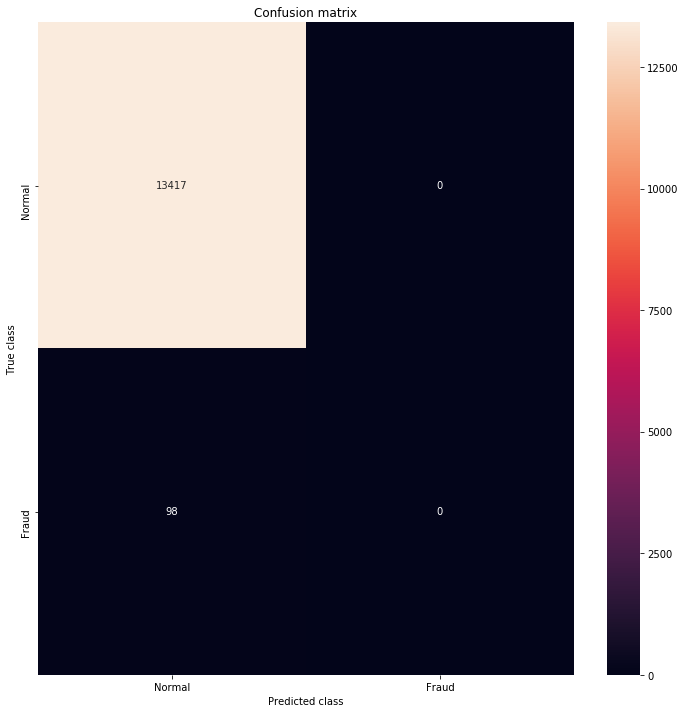

In [10]:
#printing the confusion matrix
# https://medium.com/analytics-vidhya/accuracy-vs-f1-score-6258237beca2
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix,
            xticklabels=LABELS, 
            yticklabels=LABELS,
            annot=True,
            fmt='d');
plt.title('Confusion matrix')
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [12]:
fraud = df[df['isFraud'] == 1]
valid = df[df['isFraud'] == 0]
print(f'fraud: {len(fraud)}')
print(f'valid: {len(valid)}')

outlier_fraction = len(fraud)/float(len(valid))
print(outlier_fraction)  

fraud: 498
valid: 67075
0.007424524785687663


In [15]:
# Building an Evaluation matrix on test set
#Evaluating the classifier
#printing every score of the classifier
#scoring in any thing
from sklearn.metrics import classification_report, accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef
from sklearn.metrics import confusion_matrix
n_outliers = len(fraud)
n_errors = (y_pred != y_test).sum()
n_correct = (y_pred == y_test).sum()
print(n_errors)
print(n_correct)

print('The model used is Random Forest classifier')
acc = accuracy_score(y_test,y_pred)
print(f'The accuracy is {acc}')
prec = precision_score(y_test,y_pred)
print(f'The precision is {prec}')
rec= recall_score(y_test,y_pred)
print(f'The recall is {rec}')
f1= f1_score(y_test,y_pred)
print(f'The F1-Score is {f1}')
MCC = matthews_corrcoef(y_test,y_pred)
print(f'The Matthews correlation coefficient is {MCC}')

98
13417
The model used is Random Forest classifier
The accuracy is 0.9927487976322604
The precision is 0.0
The recall is 0.0
The F1-Score is 0.0
The Matthews correlation coefficient is 0.0


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/classification.py:872: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
